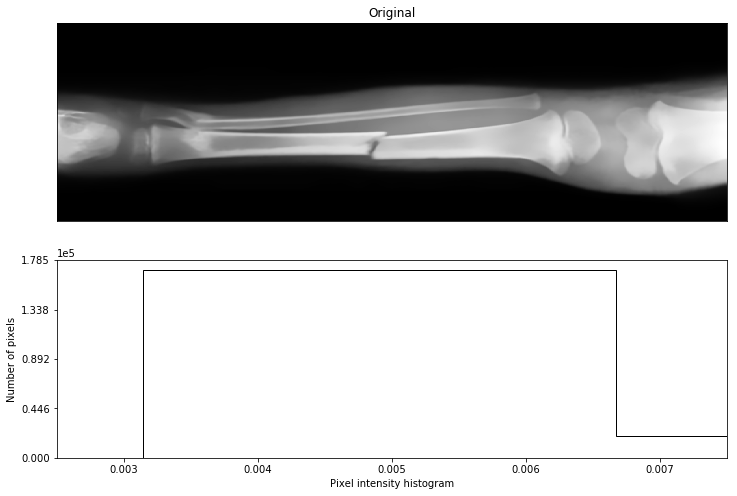

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import restoration
from skimage import img_as_float
from skimage import exposure
import numpy as np


im_bone=io.imread('resources/bone.jpg' ,as_grey=True)
im_float_bone = img_as_float(im_bone)
im_denoised_bone = restoration.denoise_nl_means(im_float_bone, h=0.05  )
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12, 8),subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(im_denoised_bone,aspect='auto', cmap='gray')
axes[0] .set_xticks([]), axes[0].set_yticks([])
axes[0] .set_title("Original")

axes[1].hist(im_denoised_bone.ravel(), bins=256, histtype='step', color='black')
axes[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
axes[1].set_xlabel('Pixel intensity histogram')
axes[1].set_xlim(0.0025, 0.0075)

axes[1].set_yticks([])

y_min, y_max = axes[1].get_ylim()
axes[1].set_ylabel('Number of pixels')
axes[1].set_yticks(np.linspace(0, y_max, 5))
 
plt.show()

/Users/hsattari/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


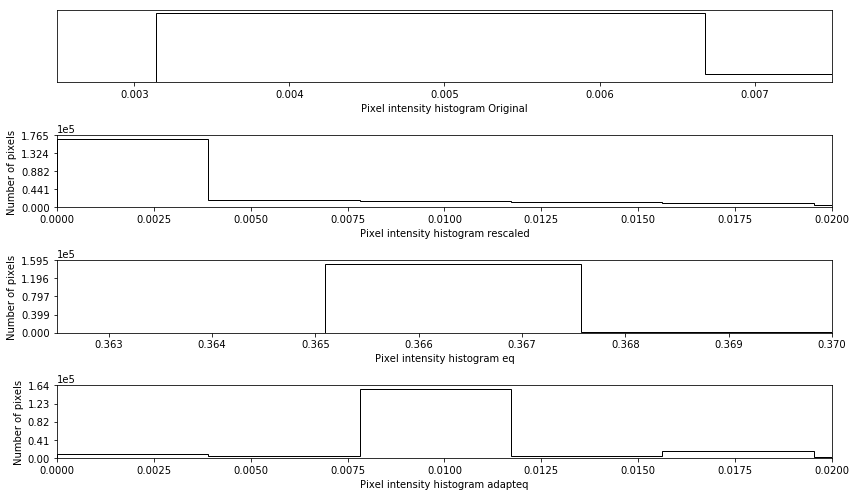

In [2]:
p2, p98 = np.percentile(im_denoised_bone, (2, 98))
img_rescale = exposure.rescale_intensity(im_denoised_bone, in_range=(p2, p98))

fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(12, 7))
#
img_eq = exposure.equalize_hist(img_rescale)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img_rescale, clip_limit=0.01)

axes[0].hist(im_denoised_bone.ravel(), bins=256, histtype='step', color='black')
axes[0].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
axes[0].set_xlabel('Pixel intensity histogram Original')
axes[0].set_xlim(0.0025, 0.0075)
axes[0].set_yticks([])

y_min, y_max = axes[0].get_ylim()
axes[1].set_ylabel('Number of pixels')
axes[1].set_yticks(np.linspace(0, y_max, 5))

axes[1].hist(img_rescale.ravel(), bins=256, histtype='step', color='black')
axes[1].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
axes[1].set_xlabel('Pixel intensity histogram rescaled')
axes[1].set_xlim(0.0, 0.02)
axes[1].set_yticks([])

y_min, y_max = axes[1].get_ylim()
axes[1].set_ylabel('Number of pixels')
axes[1].set_yticks(np.linspace(0, y_max, 5))

axes[2].hist(img_eq.ravel(), bins=256, histtype='step', color='black')
axes[2].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
axes[2].set_xlabel('Pixel intensity histogram eq')
axes[2].set_xlim(0.3625, 0.37)
axes[2].set_yticks([])

y_min, y_max = axes[2].get_ylim()
axes[2].set_ylabel('Number of pixels')
axes[2].set_yticks(np.linspace(0, y_max, 5))

axes[3].hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')
axes[3].ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
axes[3].set_xlabel('Pixel intensity histogram adapteq')
axes[3].set_xlim(0, 0.02)
axes[3].set_yticks([])

y_min, y_max = axes[3].get_ylim()
axes[3].set_ylabel('Number of pixels')
axes[3].set_yticks(np.linspace(0, y_max, 5))

plt.tight_layout()
plt.show()

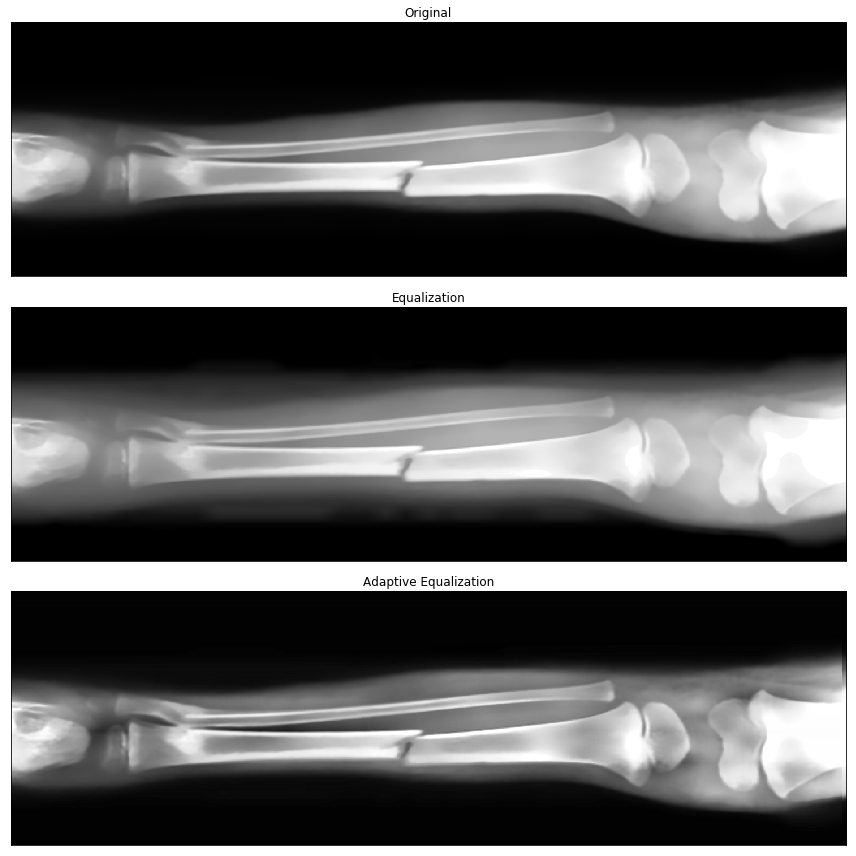

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True,figsize=(12, 12),subplot_kw={'adjustable': 'box-forced'})
#
axes[0].imshow(img_rescale,aspect='auto', cmap='gray')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[0].set_title("Original")
axes[1].imshow(img_eq,aspect='auto', cmap='gray')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[1].set_title("Equalization")
axes[2].imshow(img_adapteq,aspect='auto', cmap='gray')
axes[2].set_xticks([]), axes[1].set_yticks([])
axes[2].set_title("Adaptive Equalization")
plt.tight_layout()
plt.show()